#**1.Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2.Loading Data**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [6]:
import pandas as pd
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150
999,1000,12-04-2023,CUST1000,Male,47,Electronics,4,30,120


# **3.Data Overview**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
df.shape

(1000, 9)

#**4.Data Cleaning**

In [11]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.drop_duplicates(inplace=True)

print("Missing values per column:")

print(df.isnull().sum())

df.head()



Missing values per column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# **5.Descriptive Statistics**

In [12]:
print("Descriptive Statistics for Total Amount:")

print(f"Mean   : {df['Total Amount'].mean():.2f}")

print(f"Median : {df['Total Amount'].median():.2f}")

print(f"Mode   : {df['Total Amount'].mode()[0]}")

print(f"Std Dev: {df['Total Amount'].std():.2f}")

Descriptive Statistics for Total Amount:
Mean   : 456.00
Median : 135.00
Mode   : 50
Std Dev: 560.00


# **6.Time Series Analysis**

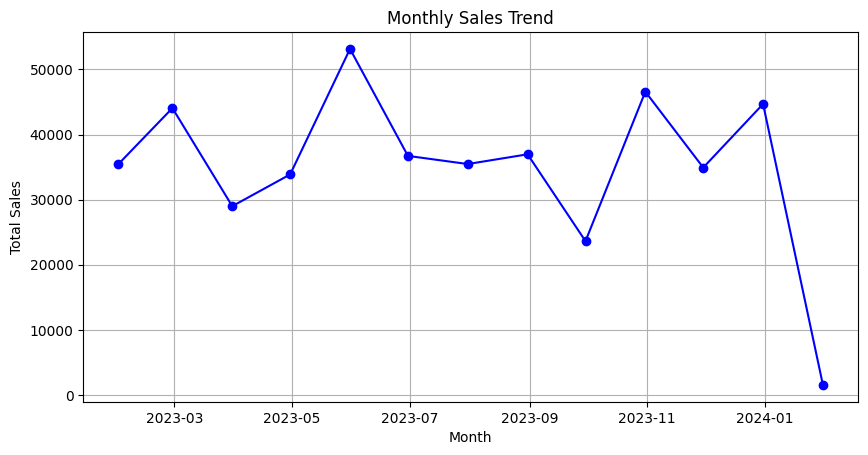

In [13]:

df.set_index('Date', inplace=True)

# Calculate monthly sales
monthly_sales = df['Total Amount'].resample('M').sum()

plt.figure(figsize=(10,4.8))
plt.plot(monthly_sales, marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

df.reset_index(inplace=True)

# **7.Customer and product Analysis**

**Top 10 Customers:**

In [14]:

top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("Top Customers:\n", top_customers)



Top Customers:
 Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64


**Total sales by product category:**

In [15]:

top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:\n", top_products)


Total Sales by Product Category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


# **8.Data Visualizations**

**Product category sales:**

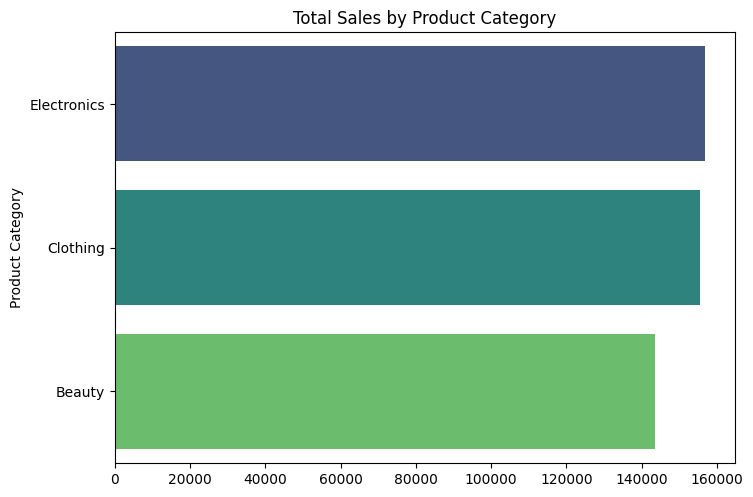

In [16]:
plt.figure(figsize=(8,5.6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Total Sales by Product Category")
plt.show()

**Sales by Gender:**

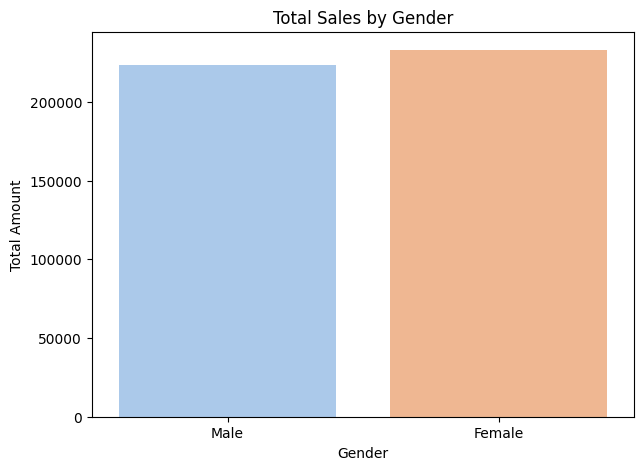

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum, ci=None, palette="pastel")
plt.title("Total Sales by Gender")
plt.show()

**8.Sales Analysis by Age Group:**

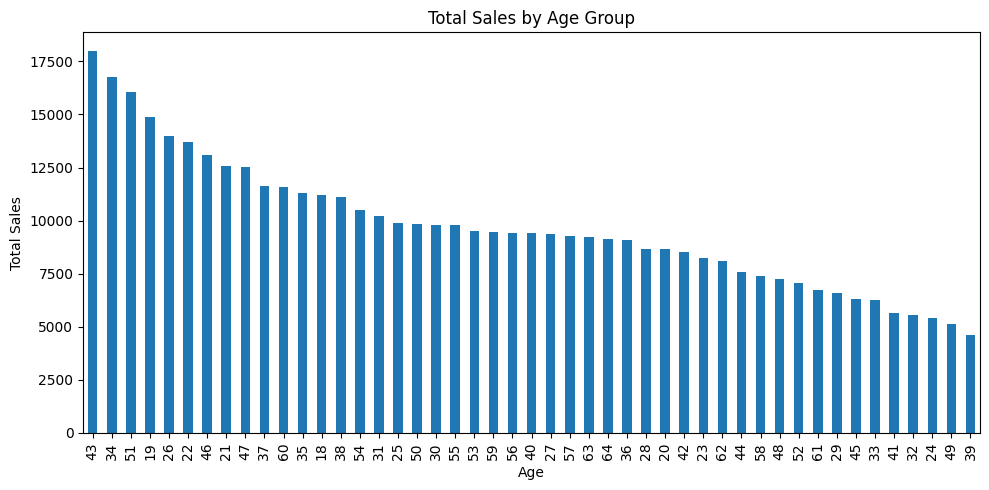

In [24]:
sales_by_age = df.groupby('Age')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sales_by_age.plot(kind='bar')
plt.title("Total Sales by Age Group")
plt.xlabel("Age")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Correlation heatmap:**

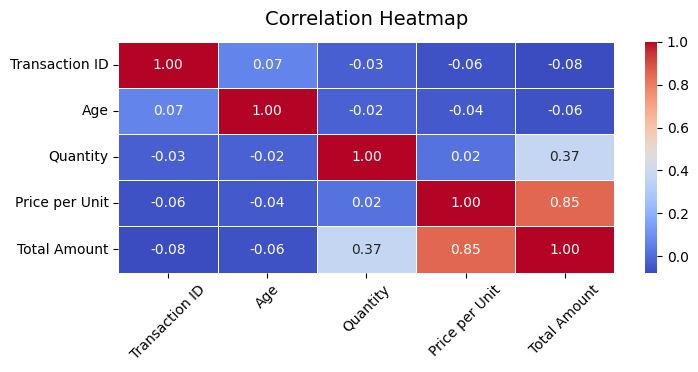

In [19]:
plt.figure(figsize=(8,3))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(
    numerical_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=14, pad=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Thank You!!**
